# Outlier handling from a dataset 

In [2]:
# importing the useful libraries
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
# iam taking a dataset of diamond
diamond_data=sb.load_dataset('diamonds')

In [4]:
diamond_data['table'].describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

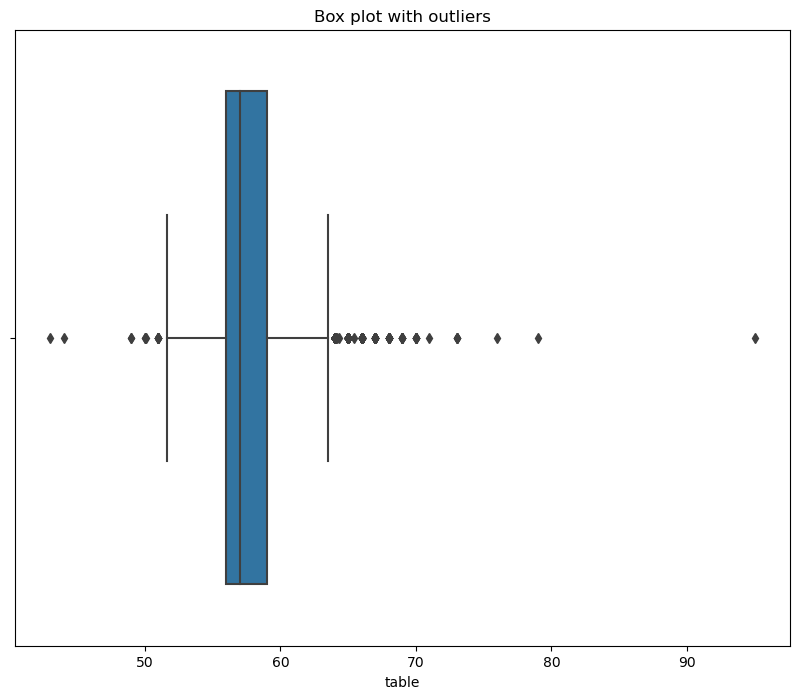

In [7]:

plt.figure(figsize=(10,8))
plt.title("Box plot with outliers")
sb.boxplot(x='table',data=diamond_data);

In [211]:
#checking quadrants
Q1=diamond_data['table'].quantile(0.25)
Q2=diamond_data['table'].median()
Q3=diamond_data['table'].quantile(0.75)

# interquartile range
IQR=Q3-Q1

# filtering for upperference and lowerference
upperference= Q3 +1.5*IQR
lowerference=Q1 - 1.5 *IQR

# generating the boundries of box
data_filter= diamond_data[(diamond_data['table']>=lowerference) & (diamond_data['table']<=upperference)]

<Axes: title={'center': 'Box plot after dropping the outlier'}, xlabel='table'>

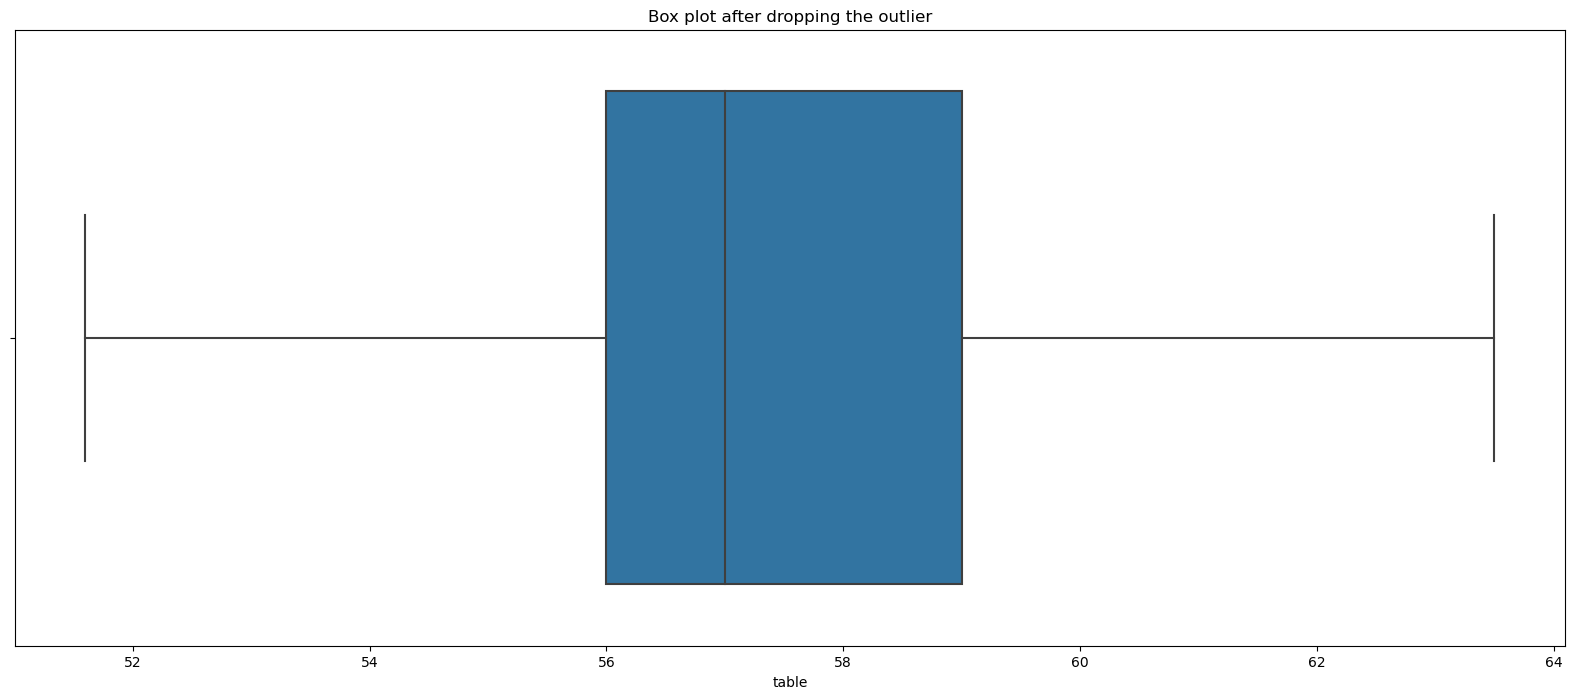

In [212]:
# representing the box plot after dropping outlier.
plt.figure(figsize=(20,8))
plt.title("Box plot after dropping the outlier")
sb.boxplot(x=data_filter['table'],data=diamond_data)

<Axes: xlabel='table', ylabel='carat'>

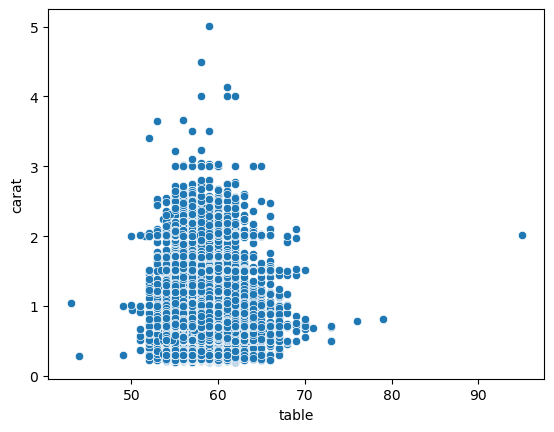

In [213]:
sb.scatterplot(x=diamond_data['table'],y='carat',data=diamond_data)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


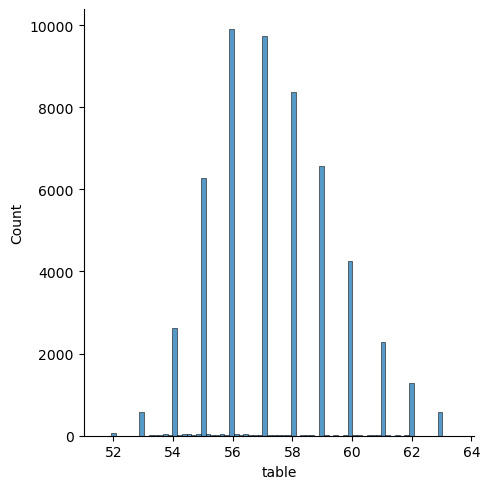

In [214]:
sb.displot(x=data_filter['table'],data=diamond_data)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


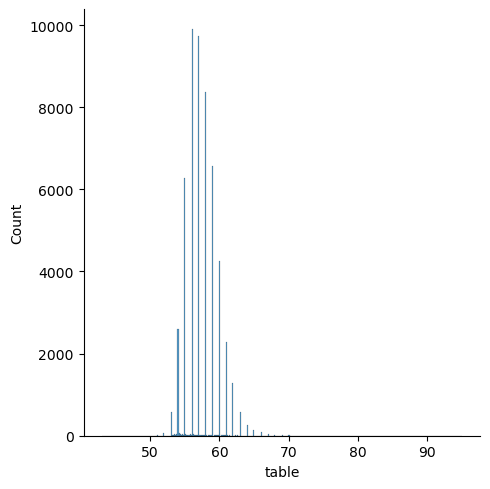

In [215]:
sb.displot(x=diamond_data['table'],data=diamond_data)

<Axes: xlabel='table', ylabel='Density'>

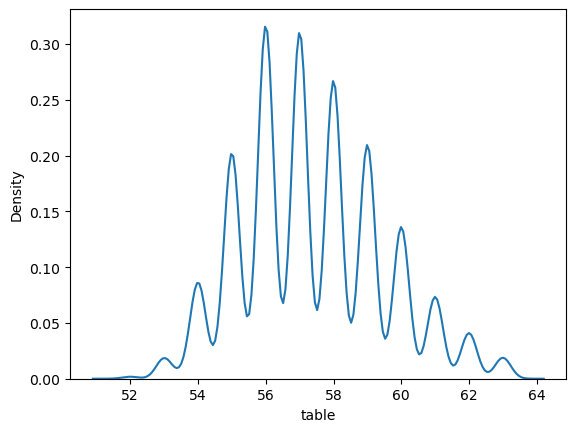

In [216]:
sb.kdeplot(x=data_filter['table'],data=diamond_data)

<Axes: xlabel='table', ylabel='Density'>

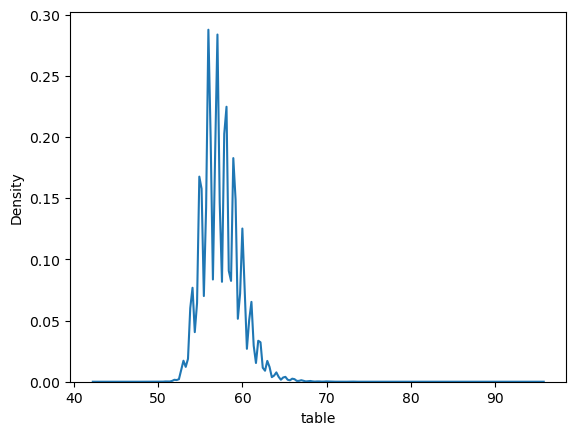

In [217]:
sb.kdeplot(x=diamond_data['table'],data=diamond_data)

## Imputing the outlier with median values

In [8]:

diamond_data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


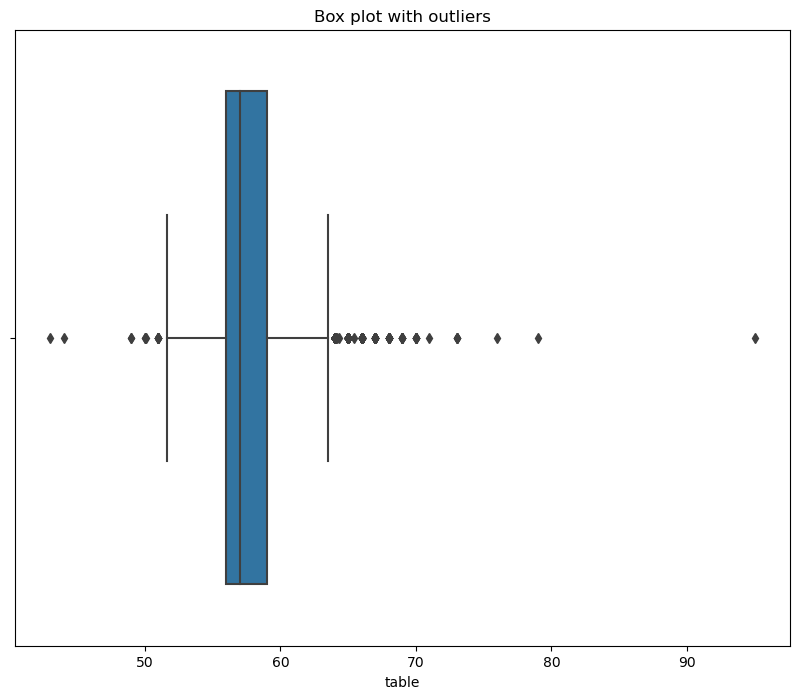

In [9]:

plt.figure(figsize=(10,8))
plt.title("Box plot with outliers")
sb.boxplot(x='table',data=diamond_data);

In [221]:
#checking quadrants
Q1=diamond_data['table'].quantile(0.25)
Q2=diamond_data['table'].median()
Q3=diamond_data['table'].quantile(0.75)

# interquartile range
IQR=Q3-Q1

# filtering for upperference and lowerference
upperference_1= Q3 +1.5*IQR
lowerference_2=Q1 - 1.5 *IQR

In [245]:
#changing the values with median value
diamond_data.loc[(diamond_data['table']<lowerference_2)|(diamond_data['table']>upperference_1),'table']=md

In [228]:
Q2

57.0

In [236]:
md=diamond_data['table'].median()
md

57.0

In [242]:
diamond_data['table']

0        55.0
1        61.0
2        57.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

Text(0.5, 1.0, 'Imputted the outlier with median value')

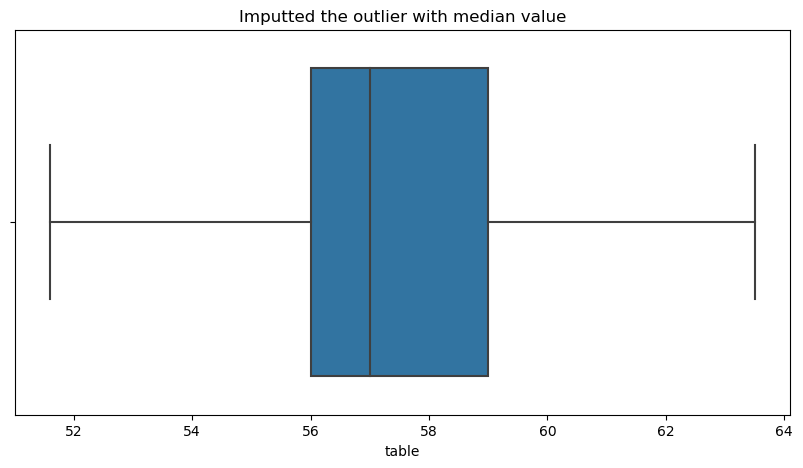

In [250]:
plt.figure(figsize=(10,5))
sb.boxplot(x=diamond_data['table'],data=diamond_data)
plt.title("Imputted the outlier with median value")

<Axes: xlabel='table', ylabel='Density'>

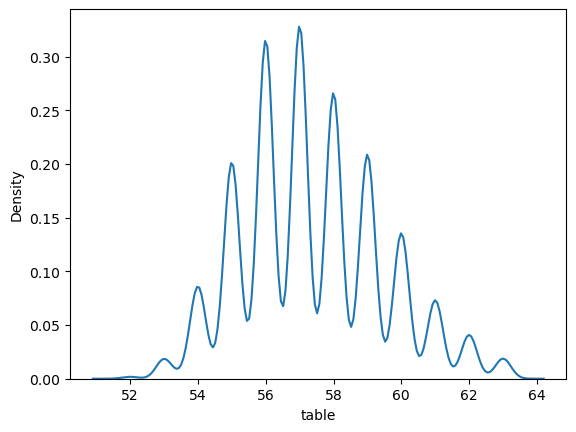

In [251]:
sb.kdeplot(x=diamond_data['table'])